In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
data = pd.read_csv('wine.csv')
#check distrubution of the data
data.describe()


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [3]:
#check null value
data.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [4]:
# Separate the features from the labels
X = data.drop(columns=['quality', 'color'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

Text(0, 0.5, 'Principal Component 2')

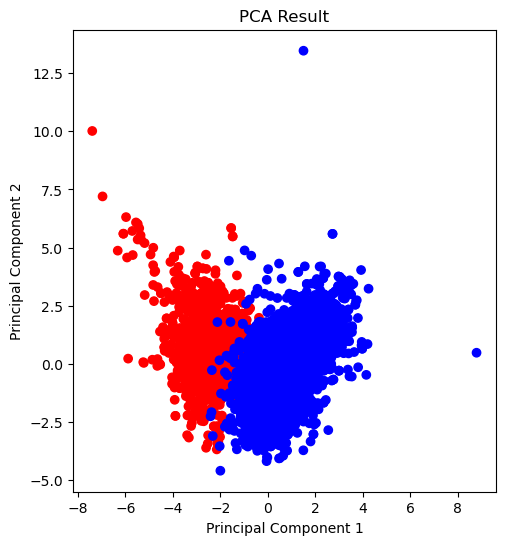

In [6]:
# Visualize PCA results
plt.figure(figsize=(12, 6))
# Create a subplot for the scatter plot
plt.subplot(1, 2, 1)
# Scatter plot of PCA results with color mapping
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['color'].map({'red': 'red', 'white': 'blue'}))
# Set the title and labels for the plot
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [7]:
# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

Text(0, 0.5, 't-SNE Dimension 2')

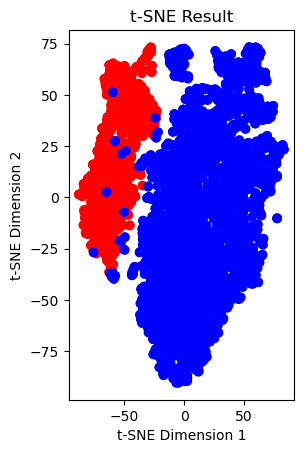

In [8]:
# Visualize t-SNE results
plt.subplot(1, 2, 2)
# Scatter plot of t-SNE results with color mapping
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=data['color'].map({'red': 'red', 'white': 'blue'}))
# Set the title and labels for the plot
plt.title('t-SNE Result')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

Text(0, 0.5, 't-SNE Dimension 2')

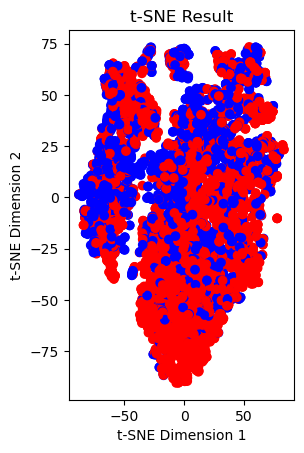

In [9]:
# Visualize t-SNE results with color determined by quality labels
quality_labels = data['quality']
# Determine colors based on quality labels (red for quality > 5, blue otherwise)
colors = ['red' if q > 5 else 'blue' for q in quality_labels]
# Create a subplot for the scatter plot
plt.subplot(1, 2, 2)
# Scatter plot of t-SNE results with color determined by quality labels
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=colors)
plt.title('t-SNE Result')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

In [10]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=2,n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

Text(0, 0.5, 't-SNE Dimension 2')

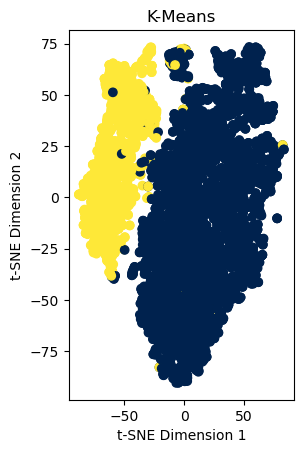

In [12]:
#Visualize t-SNE results with color mapping based on K-Means clusters
plt.subplot(1, 2, 2)
# Scatter plot of t-SNE results with color mapping based on K-Means clusters
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap = "cividis")
plt.title('K-Means')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')